Positive words


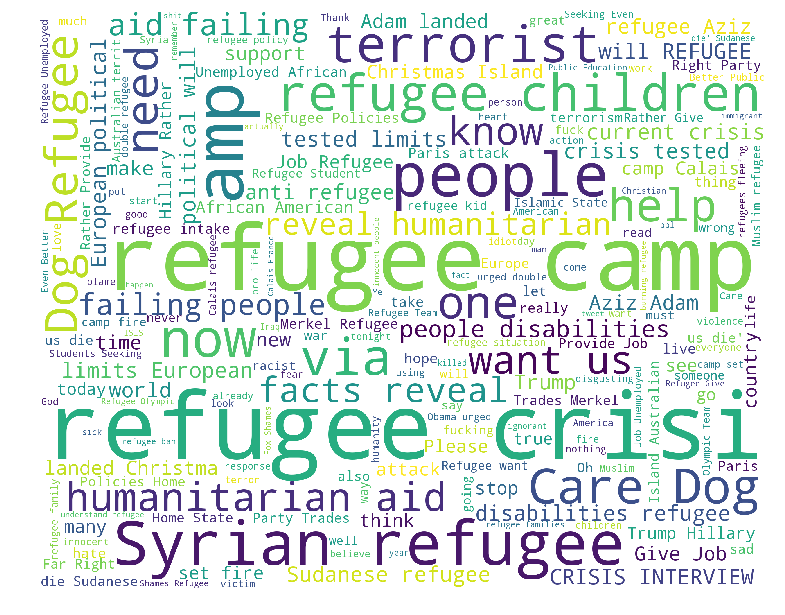

Negative words


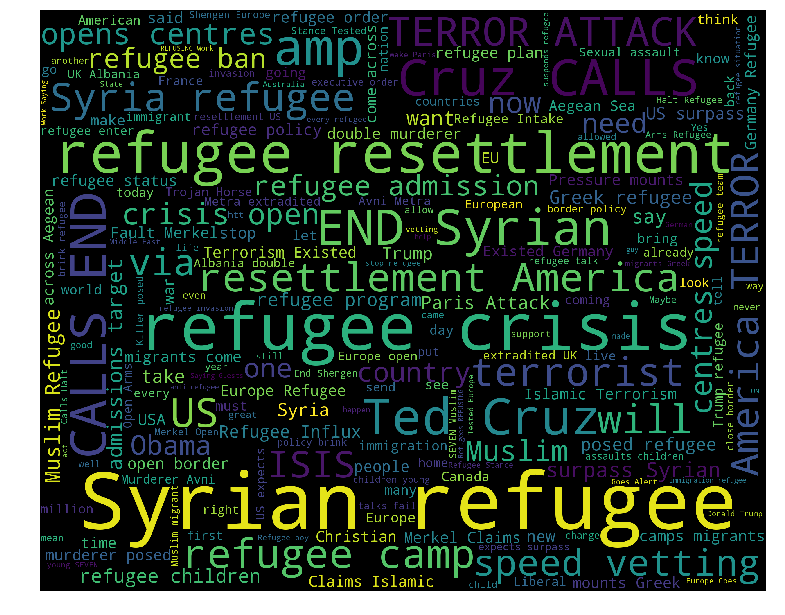

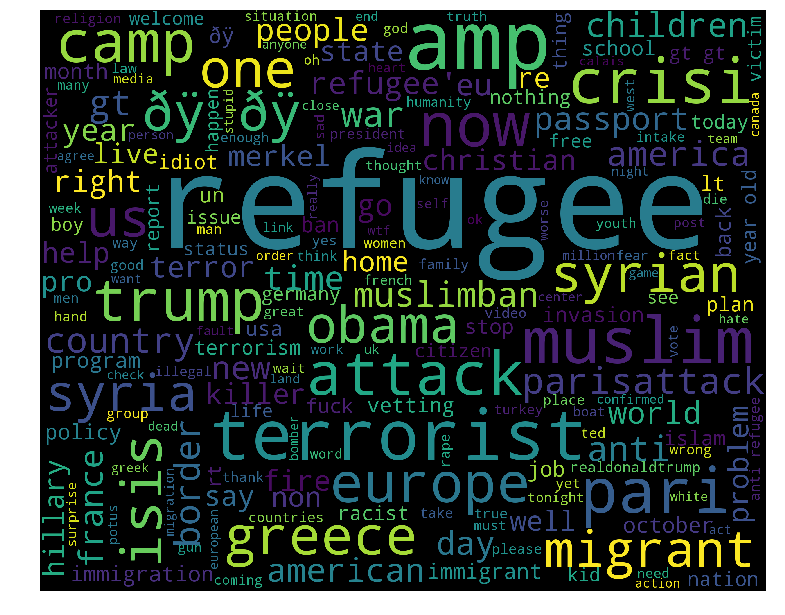

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt



from subprocess import check_output
data = pd.read_excel('collection.xlsx')

data = data[['Text','Sentiments']]

train, test = train_test_split(data,test_size = 0.1)

train = train[train.Sentiments != 0]
train = train[train.Sentiments != 5]
train_pos = train[ train['Sentiments'] == 1]
train_pos = train_pos['Text']
train_neg = train[ train['Sentiments'] == 2]
train_neg = train_neg['Text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_cleaned,row.Sentiments))

test_pos = test[ test['Sentiments'] == 1]
test_pos = test_pos['Text']
test_neg = test[ test['Sentiments'] == 2]
test_neg = test_neg['Text']

def get_words_in_tweets(tweets):
    all = []
    for (words, Sentiments) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

wordcloud_draw(w_features)


